# **I. Tổng quan bài toán**

# **1. Giới thiệu bài toán**
Bạn đang đứng trong một quầy thanh toán và nhân viên thu ngân nói với bạn rằng thẻ của bạn bị từ chối. Trong khi đó, bạn chắc chắn rằng thẻ của mình hoàn toàn dư khả năng để thanh toán. Bạn thử lại một lần nữa nhưng kết quả vẫn bị từ chối. Khi đứng sang cạnh để nhường chỗ thanh toán cho những người khác, bạn lại nhận được một tin nhắn từ ngân hàng về việc có tiếp tục thanh toán hay không.

Mặc dù có lẽ là cồng kềnh và có thể gây khó chịu cho bạn ở thời điểm hiện tại, nhưng hệ thống phòng chống gian lận này đã tiết kiệm cho người tiêu dùng hàng triệu đô la mỗi năm. Các nhà nghiên cứu từ IEEE Computational Intelligence Society (IEEE-CIS) muốn cải thiện con số này, đồng thời cải thiện trải nghiệm của khách hàng. Với khả năng phát hiện gian lận với độ chính xác cao hơn, bạn có thể sử dụng chip của mình mà không gặp rắc rối.

Trong cuộc thi này, bạn sẽ đánh giá điểm chuẩn các mô hình máy học trên một tập dữ liệu quy mô lớn đầy thử thách. Dữ liệu đến từ các giao dịch thương mại điện tử trong thế giới thực của Vesta và chứa một loạt các tính năng từ loại thiết bị đến tính năng của sản phẩm. Bạn cũng có cơ hội tạo các tính năng mới để cải thiện kết quả của mình.

# **2. Nguồn dữ liệu sử dụng**
Vesta Corporation đã cung cấp bộ dữ liệu cho cuộc thi này. Vesta Corporation là công ty tiên phong trong các giải pháp thanh toán thương mại điện tử đảm bảo. Được thành lập vào năm 1995, Vesta tiên phong trong quy trình giao dịch thanh toán bằng thẻ không có mặt (CNP) được đảm bảo hoàn toàn cho ngành viễn thông. Kể từ đó, Vesta đã mở rộng mạnh mẽ khả năng khoa học dữ liệu và máy học trên toàn cầu và củng cố vị trí dẫn đầu trong lĩnh vực thanh toán thương mại điện tử được đảm bảo. Ngày nay, Vesta đảm bảo hơn 18 tỷ đô la trong các giao dịch hàng năm.

# **3. Tệp dữ liệu sử dụng**
Dữ liệu được chia thành hai tệp identity và transaction, được kết hợp bởi TransactionID. Không phải tất cả các giao dịch đều có thông tin nhận dạng tương ứng.

Đối với mỗi TransactionID trong tập hợp thử nghiệm, bạn phải dự đoán xác suất một giao dịch trực tuyến là gian lận cho biến isFraud. 

- train_{transaction, identity}.csv - bộ đào tạo
- test_{transaction, identity}.csv - bộ thử nghiệm (bạn phải dự đoán giá trị isFraud cho những quan sát này)
- sample_submission.csv - một tệp submission mẫu theo đúng định dạng


# **4. Phương thức triển khai bài toán**
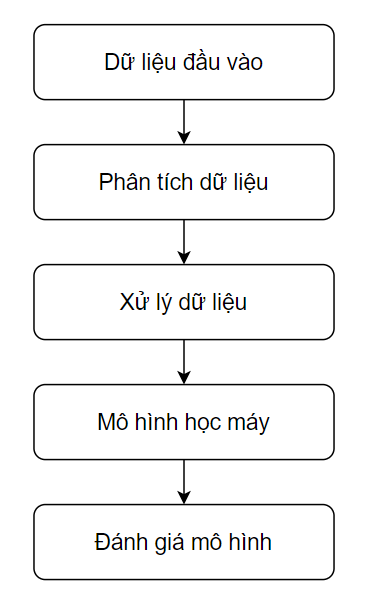

# **II. Phân tích dữ liệu**

Thêm các thư viện cần thiết

In [ ]:
import pandas as pd # đọc và xử lý dữ liêu, vd: pd.read_csv
import numpy as np #đại số tuyến tính, tăng khả năng tính toán

# một số thư viện cho mô hình học máy
import sklearn
import lightgbm as lgb
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#một số thư viện mô phỏng dữ liệu
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
from scipy.stats.mstats import winsorize
import re
import gc
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]


# **1. Đọc dữ liệu và hiện thị dữ liệu**
Đối với mỗi tập train_transaction, test_transaction, train_identity, test_identity, ta sẽ đọc và hiển thị một số hàng để xem xét tổng quan dữ liệu. Ta sẽ dùng một số hàm có sẵn trong các thư viện để làm được điều này.

In [ ]:
train_transaction = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_transaction = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')
train_identity = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
test_identity = pd.read_csv('../input/ieee-fraud-detection/test_identity.csv')

Xem khối lượng dữ liệu, với mỗi tệp ta sẽ có tương ứng vời số hàng và số cột

In [ ]:
train_transaction.shape, test_transaction.shape, train_identity.shape,  test_identity.shape

In [ ]:
train_transaction.head() #hiển thị 5 hàng dữ liệu của tập train_transaction

In [ ]:
test_transaction.head() #hiển thị 5 hàng dữ liệu của tập test_transaction

In [ ]:
train_identity.head() #hiển thị 5 hàng dữ liệu của tập train_identity

In [ ]:
test_identity.head() #hiển thị 5 hàng dữ liệu của tập test_identity

# **2. Đánh giá dữ liệu**

In [ ]:
train_transaction.info(), test_transaction.info() #lấy các thông tin về dữ liệu

Dữ liệu test và dữ liệu train có 393 cột không bao gồm dữ liệu isFraud. Dựa trên TransactionDT, dữ liệu test được giả định là đã được tạo sau dữ liệu train.

In [ ]:
train_transaction.isnull().sum()

In [ ]:
train_identity.isnull().sum()

In [ ]:
test_transaction.isnull().sum()

In [ ]:
test_identity.isnull().sum()

Tất cả các tập dữ liệu đều có các giá trị bị thiếu, được hiểu là phổ biến trong thế giới thực.

# **3. Phân tích các đặc trưng dữ liệu**

# **TransactionID**

In [ ]:
# Tại đây ta sẽ xác nhận tất cả các transaction trong `train_identity`
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

- 24,4% TransactionID trong train_transaction (144233/590540) có train_identity được liên kết. 
- 28,0% TransactionID trong test_transaction (141907 / 506691) có train_identity được liên kết.

# **Biểu đồ về phân phối gian lận (isFraud)**

In [ ]:
# Initializing Pie Chart for visualizing the above data

labels = '1-Fraud', '0-Not Fraud'
sizes = [len(train_transaction[train_transaction['isFraud'] == 1]), len(train_transaction[train_transaction['isFraud'] == 0])]
colors = ['red', 'green']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

Nhận xét: 
- Hầu hết giao các giao dịch là không gian lận
- Chỉ khoảng 3.5% dữ liệu giao dịch là gian lận
> Nếu sử dụng khung dữ liệu này làm cơ sở cho các mô hình dự đoán và phân tích, rất có thể gặp rất nhiều lỗi và các thuật toán có thể sẽ bị thừa vì nó sẽ "giả định" rằng hầu hết các giao dịch không phải là gian lận. Nhưng mục đích của mô hình là phát hiện ra các mẫu có dấu hiệu gian lận. Do đó, cần chú ý đến vấn đề overfitting trong quá trình phân tích.

# **Phân bố Train và Test theo sự phân chia theo chuỗi thời gian (TransactionDT)**

In [ ]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

In [ ]:
ax = train_transaction.plot(x='TransactionDT',
                       y='TransactionAmt',
                       kind='scatter',
                       alpha=0.01,
                       label='TransactionAmt-train',
                       title='Train and test Transaction Ammounts by Time (TransactionDT)',
                       ylim=(0, 5000),
                       figsize=(15, 5))
test_transaction.plot(x='TransactionDT',
                      y='TransactionAmt',
                      kind='scatter',
                      label='TransactionAmt-test',
                      alpha=0.01,
                      color=color_pal[1],
                       ylim=(0, 5000),
                      ax=ax)
train_transaction.loc[train_transaction['isFraud'] == 1] \
    .plot(x='TransactionDT',
         y='TransactionAmt',
         kind='scatter',
         alpha=0.01,
         label='TransactionAmt-train',
         title='Train and test Transaction Ammounts by Time (TransactionDT)',
         ylim=(0, 5000),
         color='orange',
         figsize=(15, 5),
         ax=ax)
plt.show()

Nhận xét:
- Tính năng TransactionDT là tính năng hẹn giờ từ một ngày giờ tham chiếu nhất định (không phải dấu thời gian thực tế). Một phát hiện sớm về dữ liệu là tập train và tập test dường như được phân chia theo thời gian. Có một khoảng cách nhỏ ở giữa, tập train là từ một khoảng thời gian trước đó và tập test là từ một khoảng thời gian sau. Điều này sẽ ảnh hưởng đến các kỹ thuật xác nhận chéo nào nên được sử dụng.

# **Phân phối số lượng phí giao dịch (TransactionAmt)**

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()

Nhận xét: Các khoản phí gian lận có số tiền giao dịch trung bình cao hơn


# **Biểu đồ phân phối ProductCD**

In [ ]:
# theo số lượng
train_transaction.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

Nhận xét:
- ProductCD của W có số lượng nhiều nhất
- ProductCD của S có số lượng ít nhất


In [ ]:
#theo phần trăm là gian lận
train_transaction.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

Nhận xét:
- ProductCD của C có nhiều gian lận nhất với khoảng 12%
- ProductCD của W có ít gian lận nhất với khoảng 2%

# **Biểu đồ phần trăm giá trị NA cho từng đối tượng**

In [ ]:
figure(figsize=(15, 10))

sns.barplot(y=train_transaction.isnull().sum().sort_values(ascending=False)/len(train_transaction),
            x=train_transaction.isnull().sum().sort_values(ascending=False).index,
            palette = "Spectral")
title("Percentage of Missing Values", size=10)

In [ ]:
columns_def = pd.DataFrame({"NA_count":train_transaction.isnull().sum().sort_values(ascending=False)})
columns_def["Per"]=columns_def["NA_count"]/len(train_transaction)

In [ ]:
columns_def.head(50)

In [ ]:
columns_def.tail(50)

Tập dữ liệu có quá nhiều giá trị bị thiếu.

# **III. Xử lý dữ liệu**

# **1. Giảm bộ nhớ**

Làm việc với dữ liệu lớn trong khi đào tạo mô hình ML yêu cầu bộ nhớ RAM lớn. Để khắc phục hạn chế này, ta sử dụng một hàm để giảm dung lượng bộ nhớ của dữ liệu. Cách tiếp cận chung là chuyển đổi loại dtype của từng tính năng ('int16', 'int32', 'int64', 'float16', 'float32', 'float64') thành loại dtype thấp nhất có thể.

In [ ]:
# Giảm bộ nhớ
def reduce_mem_usage(df, verbose=True):
    #các loại dtype
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# **2. Chuẩn bị dữ liệu**

In [ ]:
#kết hợp các tập dữ liệu train và test
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

del train_identity, train_transaction, test_identity, test_transaction
gc.collect();

In [ ]:
#hiển thị số lượng dữ liệu
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

In [ ]:
# giải quyết việc đặt tên không nhất quán ở các cột id
test.rename(columns=lambda x: x.replace("id-","id_") if "id-" in x else x, inplace=True)

Vì hầu hết tất cả các giá trị của 'TransactionID' là duy nhất, nên nó sẽ bị loại bỏ.

In [ ]:
train = train.drop('TransactionID', axis=1)
test = test.drop('TransactionID', axis=1)

In [ ]:
#giảm bộ nhớ của dữ liệu
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
gc.collect()

# **3. Xử lý các giá trị bị thiếu**

In [ ]:
#bỏ các cột có giá trị null lớn hơn 90%
one_value_cols, many_null_cols, big_top_value_cols =[],[],[] 

for df in [train, test]:
  one_value_cols += [col for col in df.columns if df[col].nunique() == 1]
  many_null_cols += [col for col in df.columns if df[col].isnull().sum() / df.shape[0] > 0.9]
  big_top_value_cols += [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

cols_to_drop = list(set(one_value_cols + many_null_cols + big_top_value_cols))

if 'isFraud' in cols_to_drop: 
  cols_to_drop.remove('isFraud')

train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

print(f'{len(cols_to_drop)} features are going to be dropped for being useless')

**Chuyển đổi thành tổng số ngày, tuần và giờ**

In [ ]:
#chon ngay dau tien la ngay 30 thang 11 nam 2017
import datetime #su dung thu vien datatime de tinh toan cac dac trung thoi gian
START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
dates_range = pd.date_range(start='2017-10-01', end='2019-01-01')
us_holidays = calendar().holidays(start=dates_range.min(), end=dates_range.max())

In [ ]:
for k, df in enumerate([train, test]):
  df['DT'] = df['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
  df['DT_M'] = ((df['DT'].dt.year-2017-k)*12 + df['DT'].dt.month).astype(np.int8).apply(lambda x: x%12 if x>12 else x) #chuyen doi cac thang trong mot nam
  df['DT_W'] = ((df['DT'].dt.year-2017-k)*52 + df['DT'].dt.weekofyear).astype(np.int8).apply(lambda x: x%52 if x>52 else x) #chuyen doi cac tuan trong mot nam
  df['DT_D'] = ((df['DT'].dt.year-2017-k)*365 + df['DT'].dt.dayofyear).astype(np.int16).apply(lambda x: x%365 if x>365 else x) #chuyen doi cac ngay trong mot nam
  
  df['DT_hour'] = (df['DT'].dt.hour).astype(np.int8)
  df['DT_day_week'] = (df['DT'].dt.dayofweek).astype(np.int8)
  df['DT_day_month'] = (df['DT'].dt.day).astype(np.int8)

  # Holidays
  df['DT_holiday'] = (df['DT'].dt.date.astype('datetime64').isin(us_holidays)).astype(np.int8)

In [ ]:
train = train.drop('DT',axis=1)
test = test.drop('DT',axis=1)

In [ ]:
columns=[col for col in train.columns if re.search('^DT_.*', col)]
columns.remove('DT_D')

In [ ]:
#xu ly cac gia tri bi thieu id_30
old_versions_id_30 = set(train['id_30'].unique()) - set(test['id_30'].unique())
new_versions_id_30 = set(test['id_30'].unique()) - set(train['id_30'].unique())
test['id_30'] =test['id_30'].apply(lambda x: np.nan if x in new_versions_id_30 else x)
train['id_30'] =train['id_30'].apply(lambda x: np.nan if x in old_versions_id_30 else x)

In [ ]:
#xu ly cac gia tri bi thieu id_31
old_versions_id_31 = set(train['id_31'].unique()) - set(test['id_31'].unique())
new_versions_id_31 = set(test['id_31'].unique()) - set(train['id_31'].unique())
test['id_31'] =test['id_31'].apply(lambda x: np.nan if x in new_versions_id_31 else x)
train['id_31'] =train['id_31'].apply(lambda x: np.nan if x in old_versions_id_31 else x)

In [ ]:
#xu ly cac gia tri bi thieu id_33
old_versions_id_33 = set(train['id_33'].unique()) - set(test['id_33'].unique())
new_versions_id_33 = set(test['id_33'].unique()) - set(train['id_33'].unique())
test['id_33'] =test['id_33'].apply(lambda x: np.nan if x in new_versions_id_33 else x)
train['id_33'] =train['id_33'].apply(lambda x: np.nan if x in old_versions_id_33 else x)

In [ ]:
train = train.drop('id_29', axis=1)
test = test.drop('id_29', axis=1)
columns=[col for col in train.columns if re.search('^V\d*', col)]
len(columns)

# **4. Remove collinear features (xóa các đặc trưng có tính tương đồng cao)**

Remove collinear features (xóa các đặc trưng có tính tương đồng cao) trong khung dữ liệu có hệ số tương quan lớn hơn ngưỡng. Việc loại bỏ các đặc trưng này có thể giúp mô hình tổng quát hóa và cải thiện khả năng diễn giải của mô hình.

In [ ]:
# xóa các đặc trưng có tính tương đồng cao khỏi dữ liệu
def remove_collinear_features(x, threshold):
    '''
    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Tính toán ma trận tương quan
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Lặp lại thông qua ma trận tương quan và so sánh các mối tương quan
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # Nếu sự tương quan vượt quá ngưỡng
            if val >= threshold:
                # Thêm các đặc trưng tương đồng vào mảng drop_cols
                drop_cols.append(col.values[0])

    # xóa một trong mỗi cặp cột tương quan
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return drops

In [ ]:
corr_treshold = 0.75
drop_col = remove_collinear_features(train[columns],corr_treshold)
len(drop_col)

In [ ]:
#xóa cột có tính tương đồng cao
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [ ]:
columns=[col for col in train.columns if re.search('^V\d*', col)]
len(columns)

**DeviceInfo**

In [ ]:
#xử lý các giá trị thiếu trong DeviceInfo
old_versions_DeviceInfo = set(train['DeviceInfo'].unique()) - set(test['DeviceInfo'].unique())
new_versions_DeviceInfo= set(test['DeviceInfo'].unique()) - set(train['DeviceInfo'].unique())
test['DeviceInfo'] =test['DeviceInfo'].apply(lambda x: np.nan if x in new_versions_DeviceInfo else x)
train['DeviceInfo'] =train['DeviceInfo'].apply(lambda x: np.nan if x in old_versions_DeviceInfo else x)

**DeviceType**

In [ ]:
for df in [train, test]:
  df['R_emaildomain_1'] = df['R_emaildomain'].fillna('').apply(lambda x: x.split(".")[0]).replace({'':np.nan})
  df['R_emaildomain_2'] = df['R_emaildomain'].str.split('.', expand=True).iloc[:,1:].fillna('').apply(lambda x:('.'.join(x)).strip('.'), axis=1).replace({'':np.nan})

**P_emaildomain**

In [ ]:
for df in [train, test]:
  df['P_emaildomain_1'] = df['P_emaildomain'].fillna('').apply(lambda x: x.split(".")[0]).replace({'':np.nan})
  df['P_emaildomain_2'] = df['P_emaildomain'].str.split('.', expand=True).iloc[:,1:].fillna('').apply(lambda x:('.'.join(x)).strip('.'), axis=1).replace({'':np.nan})

In [ ]:
train = train.drop(['R_emaildomain','P_emaildomain','P_emaildomain_2'], axis=1)
test = test.drop(['R_emaildomain','P_emaildomain','P_emaildomain_2'], axis=1)

In [ ]:
for df in [train, test]:
  df['addr'] = (df['addr2'].astype(str)+'_'+df['addr1'].astype(str)).replace({'nan_nan':np.nan})

In [ ]:
train['addr1'].nunique(), train['addr2'].nunique(), train['addr'].nunique()
test['addr1'].nunique(), test['addr2'].nunique(), test['addr'].nunique()

In [ ]:
old_versions_card1 = set(train['card1'].unique()) - set(test['card1'].unique())
new_versions_card1 = set(test['card1'].unique()) - set(train['card1'].unique())
test['card1'] =test['card1'].apply(lambda x: np.nan if x in new_versions_card1 else x)
train['card1'] =train['card1'].apply(lambda x: np.nan if x in old_versions_card1 else x)

In [ ]:
#hiển thị số lượng tần số thẻ
rareCards=[]
for k, df in enumerate([train, test]):
  rare_cards = df.card1.value_counts()
  rare_cards = rare_cards.where(rare_cards<3).dropna().sort_index().index
  rareCards += list(rare_cards)

  print(f"{('TEST' if k else 'TRAIN')}")
  print(f"Number of unique in card1: {df.card1.nunique()}")
  print(f"Number of unique values with frequency less than 3 in card1: {len(rare_cards)}\n")
rareCards = set(rareCards)

In [ ]:
for df in [train, test]:
  df['card1'] = df['card1'].apply(lambda x: np.nan if x in rareCards else x)

In [ ]:
for col in ['card2','card3','card4','card5','card6']: 
  old_versions_col= set(train[col].unique()) - set(test[col].unique())
  new_versions_col = set(test[col].unique()) - set(train[col].unique()) 
  test[col] =test[col].apply(lambda x: np.nan if x in new_versions_col else x)
  train[col] =train[col].apply(lambda x: np.nan if x in old_versions_col else x)

In [ ]:
columns=[col for col in train.columns if re.search('^D\d.*', col)]+['DT_hour']

corr_treshold = 0.75
drop_col = remove_collinear_features(train[columns],corr_treshold)
drop_col

In [ ]:
drop_col={'D12', "D11", 'D2', 'D6', 'D9'}
for df in [train, test]:
  df = df.drop(drop_col, axis=1)

In [ ]:
train.shape, test.shape

In [ ]:
columns=[col for col in train.columns if re.search('^C\d.*', col)]
corr_treshold = 0.9
drop_col = remove_collinear_features(train[columns],corr_treshold)
drop_col

In [ ]:
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [ ]:
train = train.drop('dist1', axis=1)
test = test.drop('dist1', axis=1)

In [ ]:
temp_dict = train.groupby(['M4'])['isFraud'].agg(['mean']).to_dict()['mean']
train['M4_target_mean'] = train['M4'].replace(temp_dict)
test['M4_target_mean']  = test['M4'].replace(temp_dict)

In [ ]:
temp_dict = train.groupby(['ProductCD'])['isFraud'].agg(['mean']).to_dict()['mean']
train['ProductCD_target_mean'] = train['ProductCD'].replace(temp_dict)
test['ProductCD_target_mean']  = test['ProductCD'].replace(temp_dict)

In [ ]:
train.shape, test.shape

# **5. Mã hóa tần số (Frequency Encoding)**

One hot encoding không được sử dụng để loại bỏ sự phức tạp về tính đa chiều. Mặc dù label encoding là một giải pháp tốt cho dữ liệu phân loại thứ tự, nhưng nó không phải là một giải pháp phù hợp cho dữ liệu phân loại danh nghĩa. Có thể nói mã hóa tần số là giải pháp tốt nhất cho dữ liệu này.

In [ ]:
def frequency_encoding(train, test, columns, self_encoding=False):
    for col in columns:
        df = pd.concat([train[[col]], test[[col]]])
        fq_encode = df[col].value_counts(dropna=False, normalize=True).to_dict()
        if self_encoding:
            train[col] = train[col].map(fq_encode)
            test[col]  = test[col].map(fq_encode)            
        else:
            train[col+'_freq'] = train[col].map(fq_encode)
            test[col+'_freq']  = test[col].map(fq_encode)
    return train, test

In [ ]:
self_encode_True= ['ProductCD', 'DeviceInfo', 'DeviceType', 'addr'] + \
                  ['R_emaildomain_1', 'R_emaildomain_2','P_emaildomain_1'] + \
                  ['id_12','id_15','id_16','id_28','id_30','id_31','id_33',"id_34",'id_35', 'id_36', 'id_37', 'id_38'] + \
                  ['M1','M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']+ \
                  ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15'] + \
                  [ 'card4', 'card6']

self_encode_False=['card1', 'card2', 'card3', 'card5']+ \
                  ['C1', 'C5', 'C13']

In [ ]:
train, test = frequency_encoding(train, test, self_encode_True, self_encoding=True)
train, test = frequency_encoding(train, test, self_encode_False, self_encoding=False)

# **6. PCA for V Columns**

Với rất nhiều đặc trưng, hiệu suất của thuật toán sẽ giảm sút nghiêm trọng. PCA là một cách rất phổ biến để tăng tốc thuật toán Học máy bằng cách loại bỏ các biến tương quan không đóng góp trong bất kỳ quá trình ra quyết định nào. Thời gian đào tạo các thuật toán giảm đáng kể với số lượng tính năng ít hơn. Ngoài ra, Overfitting chủ yếu xảy ra khi có quá nhiều biến trong tập dữ liệu. Vì vậy, PCA giúp khắc phục vấn đề trang bị quá mức bằng cách giảm số lượng tính năng. Vì vậy, nếu kích thước đầu vào quá cao, thì việc sử dụng PCA để tăng tốc thuật toán là một lựa chọn hợp lý.

Ta quan sát thấy rằng, V có số lượng cột lớn (khoảng 340) nhưng lại không có đóng góp nào trong quá trình ra quyết định. Vì vậy, ta có thể bỏ qua tất cả V cột bằng cách áp dụng PCA cho tất cả V cột để giảm số cột / bộ nhớ.

In [ ]:
V_columns = [col for col in train.columns if re.search('^V\d*', col)]
train[V_columns] = train[V_columns].fillna(-1)
test[V_columns] = test[V_columns].fillna(-1)

sc_V = MinMaxScaler()
sc_V.fit(train[V_columns])
train[V_columns] = sc_V.transform(train[V_columns])
test[V_columns] = sc_V.transform(test[V_columns])

In [ ]:
pca = PCA(n_components = 3)
pca.fit(train[V_columns])
pca_V_train = pca.transform(train[V_columns])
pca_V_test = pca.transform(test[V_columns])

np.cumsum(pca.explained_variance_ratio_)

In [ ]:
pca_V_train = pd.DataFrame(data = pca_V_train).add_prefix('pca_V')
train = pd.concat([train, pca_V_train], ignore_index=False, sort=False, axis=1)
train.drop(V_columns, axis=1, inplace=True)

pca_V_test = pd.DataFrame(data = pca_V_test).add_prefix('pca_V')
test = pd.concat([test, pca_V_test], ignore_index=False, sort=False, axis=1)
test.drop(V_columns, axis=1, inplace=True)

In [ ]:
del pca_V_train, pca_V_test

In [ ]:
train = train.drop('TransactionDT',axis=1)
test = test.drop('TransactionDT',axis=1)

In [ ]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

gc.collect()

Nhận xét: Tập dữ liệu được giảm đi đáng kể, khoảng 50% bộ nhớ so với lúc đầu

In [ ]:
#lưu dữ liệu
train.to_pickle('./train_1.pkl') 
test.to_pickle('./test_1.pkl')

In [ ]:
#đọc dữ liệu
# train= pd.read_pickle('./train_1.pkl') 
# test= pd.read_pickle('./test_1.pkl')

In [ ]:
train.head()

# **V. Mô hình học máy**

# **1. Logistics Regression**

In [ ]:
#bỏ các cột chứa giá trị NA
cols_with_missing = [col for col in train.columns 
                                 if train[col].isnull().any()]
train1 = train.drop(cols_with_missing, axis=1)

In [ ]:
X = train1.drop(['isFraud'], axis=1) #tap du lieu
y = train1['isFraud'] #tap nhan

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, random_state =42) #phan chia du lieu

In [ ]:
lgr = LogisticRegression(solver='saga', max_iter=20, n_jobs=-1, verbose=1)

In [ ]:
lgr.fit(X_train1, y_train1)

In [ ]:
y_pred = lgr.predict(X_test1)
print(classification_report(y_test1, y_pred, zero_division=0))

In [ ]:
y_train_pred = lgr.predict(X_train1)
print(classification_report(y_train1, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test1, lgr.predict_proba(X_test1)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train1, lgr.predict_proba(X_train1)[:, 1]))

# **2. K nearest neighbor - KNN**

In [ ]:
cols_with_missing = [col for col in train.columns 
                                 if train[col].isnull().any()]
train1 = train.drop(cols_with_missing, axis=1)

In [ ]:
X = train1.drop(['isFraud'], axis=1)
y = train1['isFraud']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train1, y_train1)

In [ ]:
y_pred = knn.predict(X_test1)
print(classification_report(y_test1, y_pred, zero_division=0))

In [ ]:
y_train_pred = knn.predict(X_train1)
print(classification_report(y_train1, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test1, knn.predict_proba(X_test1)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train1, knn.predict_proba(X_train1)[:, 1]))

# **3. DecisionTree**

In [ ]:
#thay thế giá trị NA bằng 0
# train2 = train
# train2 = train2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
cols_with_missing = [col for col in train.columns 
                                 if train[col].isnull().any()]
train1 = train.drop(cols_with_missing, axis=1)

In [ ]:
X = train1.drop(['isFraud'], axis=1)
y = train1['isFraud']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
dct = DecisionTreeClassifier(max_depth =10,random_state=10)
dct.fit(X_train1, y_train1)

In [ ]:
y_pred = dct.predict(X_test1)
print(classification_report(y_test1, y_pred, zero_division=0))

In [ ]:
y_train_pred = dct.predict(X_train1)
print(classification_report(y_train1, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test1, dct.predict_proba(X_test1)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train1, dct.predict_proba(X_train1)[:, 1]))

# **4. Random Forest**

In [ ]:
# train2 = train
# train2 = train2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
cols_with_missing = [col for col in train.columns 
                                 if train[col].isnull().any()]
train1 = train.drop(cols_with_missing, axis=1)

In [ ]:
X = train1.drop(['isFraud'], axis=1)
y = train1['isFraud']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
rdf = RandomForestClassifier(n_estimators = 10) 
rdf.fit(X_train1, y_train1)

In [ ]:
y_pred = rdf.predict(X_test1)
print(classification_report(y_test1, y_pred, zero_division=0))

In [ ]:
y_train_pred = rdf.predict(X_train1)
print(classification_report(y_train1, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test1, rdf.predict_proba(X_test1)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train1, rdf.predict_proba(X_train1)[:, 1]))

# **5. LightGBM**

In [ ]:
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
lgb = LGBMClassifier(
          max_bin = 63,
          num_leaves = 255,
          num_iterations = 500,
          learning_rate = 0.01,
          tree_learner = 'serial',
          is_dfing_metric = False,
          min_data_in_leaf = 1,
          min_sum_hessian_in_leaf = 100,
          sparse_threshold=1.0,
          # device = 'gpu',
          num_thread = -1,
          save_binary= True,
          seed= 42,
          feature_fraction_seed = 42,
          bagging_seed = 42,
          drop_seed = 42,
          data_random_seed = 42,
          objective = 'binary',
          boosting_type = 'gbdt',
          verbose = 1,
          metric = 'auc',
          is_unbalance = True,
          boost_from_average = False,
)

In [ ]:
lgb.fit(X_train, y_train)

In [ ]:
y_pred = lgb.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
y_train_pred = lgb.predict(X_train)
print(classification_report(y_train, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1]))

# **6. XGBoost**

In [ ]:
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
y_train_pred = xgb.predict(X_train)
print(classification_report(y_train, y_train_pred, zero_division=0))

In [ ]:
print('Test ROC AUC score:', roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1]))

# **VI. Tổng kết**

# **1. So sánh giữa các mô hình**

In [ ]:
y_pred = lgr.predict(X_test1)
lgr_recall = recall_score(y_test1, y_pred)
lgr_f1_score = f1_score(y_test1, y_pred)
lgr_AUC = roc_auc_score(y_test1, lgr.predict_proba(X_test1)[:, 1])

y_pred = knn.predict(X_test1)
knn_recall = recall_score(y_test1, y_pred)
knn_f1_score = f1_score(y_test1, y_pred)
knn_AUC = roc_auc_score(y_test1, knn.predict_proba(X_test1)[:, 1])

y_pred = dct.predict(X_test1)
dct_recall = recall_score(y_test1, y_pred)
dct_f1_score = f1_score(y_test1, y_pred)
dct_AUC = roc_auc_score(y_test1, dct.predict_proba(X_test1)[:, 1])

y_pred = rdf.predict(X_test1)
rdf_recall = recall_score(y_test1, y_pred)
rdf_f1_score = f1_score(y_test1, y_pred)
rdf_AUC = roc_auc_score(y_test1, rdf.predict_proba(X_test1)[:, 1])

y_pred = lgb.predict(X_test)
lgb_recall = recall_score(y_test, y_pred)
lgb_f1_score = f1_score(y_test, y_pred)
lgb_AUC = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

y_pred = xgb.predict(X_test)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred)
xgb_AUC = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1],average='micro')

In [ ]:
df_eval=pd.DataFrame({ 'Model':["LogisticsRegression","KNN","DecisionTree","RandomForest","LightGBM",'XGBOOST'],
                        'Recall':[lgr_recall,knn_recall,dct_recall,rdf_recall,lgb_recall,xgb_recall],
                        'F1':[lgr_f1_score,knn_f1_score,dct_f1_score,rdf_f1_score,lgb_f1_score,xgb_f1_score],
                        'AUC':[lgr_AUC,knn_AUC,dct_AUC,rdf_AUC,lgb_AUC,xgb_AUC]})
df_eval

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

y_pred = lgr.predict_proba(X_test1)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_pred)
auc = metrics.roc_auc_score(y_test1, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="LogisticsRegression, AUC="+str(auc))

y_pred = knn.predict_proba(X_test1)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_pred)
auc = metrics.roc_auc_score(y_test1, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

y_pred = dct.predict_proba(X_test1)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_pred)
auc = metrics.roc_auc_score(y_test1, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(auc))

y_pred = rdf.predict_proba(X_test1)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_pred)
auc = metrics.roc_auc_score(y_test1, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="RandomForest, AUC="+str(auc))

y_pred = lgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="LightGBM, AUC="+str(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
auc = round(auc, 4)
plt.plot(fpr,tpr,label="XGBOOST, AUC="+str(auc))

plt.legend(loc=0)
plt.title("AUC & ROC Curve")

Dựa vào đồ thị và bảng so sánh, mô hình được chọn là LightGBM

# **2. Chạy với tất cả dữ liệu**

In [ ]:
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']

In [ ]:
clf = LGBMClassifier(
          max_bin = 63,
          num_leaves = 255,
          num_iterations = 500,
          learning_rate = 0.01,
          tree_learner = 'serial',
          is_dfing_metric = False,
          min_data_in_leaf = 1,
          min_sum_hessian_in_leaf = 100,
          sparse_threshold=1.0,
          # device = 'gpu',
          num_thread = -1,
          save_binary= True,
          seed= 42,
          feature_fraction_seed = 42,
          bagging_seed = 42,
          drop_seed = 42,
          data_random_seed = 42,
          objective = 'binary',
          boosting_type = 'gbdt',
          verbose = 1,
          metric = 'auc',
          is_unbalance = True,
          boost_from_average = False,
)
clf.fit(X, y)

# **3. Predict submission data**

In [ ]:
# test = pd.read_pickle('../input/datatrain/test_1.pkl') 

In [ ]:
sub= pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv')
sub['isFraud']=pd.DataFrame(clf.predict_proba(test))[[1]]
sub.to_csv('./submission.csv',index=False)
sub